In [1]:
import numpy as np
import pandas as pd




In [2]:
df=pd.read_csv(r"A:\Work Docs\Data Analyst work\Campus X\00 Datasets For coding\iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder= LabelEncoder()

In [6]:
df['Species'] = encoder.fit_transform(df['Species'])

In [7]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
11,12,4.8,3.4,1.6,0.2,0
116,117,6.5,3.0,5.5,1.8,2
29,30,4.7,3.2,1.6,0.2,0
68,69,6.2,2.2,4.5,1.5,1
122,123,7.7,2.8,6.7,2.0,2


In [8]:
df=df[df['Species'] != 0 ][['SepalWidthCm', 'PetalLengthCm', 'Species']]

In [9]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


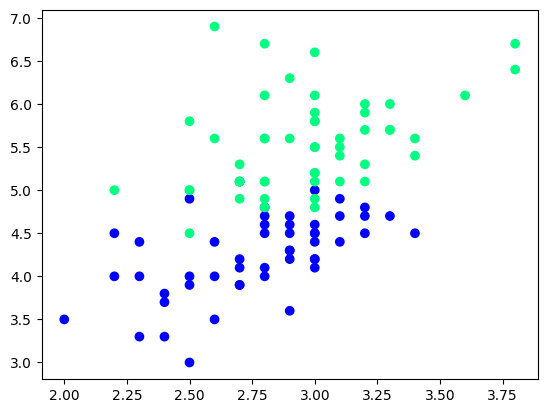

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x= df['SepalWidthCm'], y=df['PetalLengthCm'], c= df['Species'], cmap= 'winter')

In [20]:
# Taking 10 rows at a time for training
df =df.sample(100)
df.head()

,SepalWidthCm,PetalLengthCm,Species
53,2.3,4.0,1
126,2.8,4.8,2
72,2.5,4.9,1
66,3.0,4.5,1
69,2.5,3.9,1


In [22]:
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [23]:
x_test = df_val.iloc[:, :2].values
y_test = df_val.iloc[:, -1].values

In [24]:
x_test

array([[3.1, 5.5],
       [2.5, 5. ],
       [3.2, 5.9],
       [2.7, 4.9],
       [2.6, 4. ]])

In [25]:
y_test

array([2, 2, 2, 2, 1])

### Case 1- Bagging(Sample data may repeat)



In [27]:
# data for tree 1
df_bag = df_train.sample(8, replace=True)

x=df_bag.iloc[:, 0:2]
y=df_bag.iloc[:, -1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
119,2.2,5.0,2
115,3.2,5.3,2
100,3.3,6.0,2
53,2.3,4.0,1
119,2.2,5.0,2
72,2.5,4.9,1
53,2.3,4.0,1


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [29]:
dt_bag1 = DecisionTreeClassifier()

In [32]:
def evaluate(clf, x, y):
    clf.fit(x, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

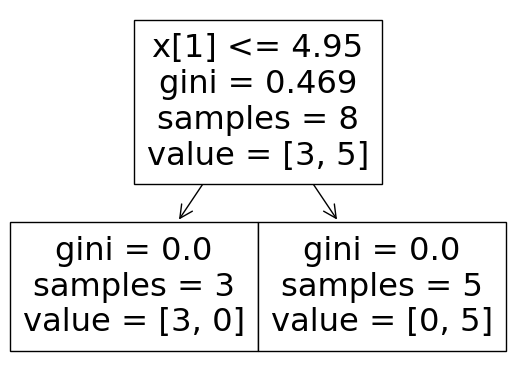

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


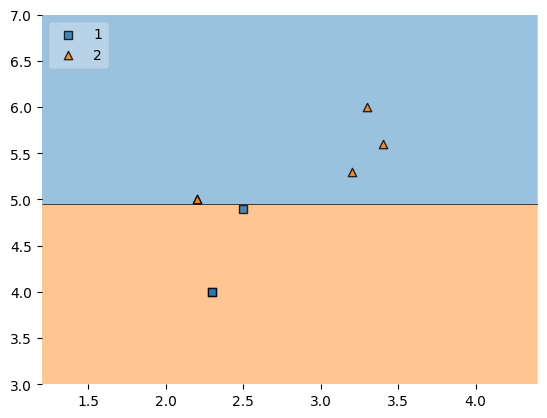

In [33]:
evaluate(dt_bag1, x, y)

In [36]:
# data for tree 2
dt_bag2 = DecisionTreeClassifier()


df_bag2 = df_train.sample(8, replace=True)

x=df_bag2.iloc[:, 0:2]
y=df_bag2.iloc[:, -1]
df_bag2

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
100,3.3,6.0,2
118,2.6,6.9,2
53,2.3,4.0,1
63,2.9,4.7,1
100,3.3,6.0,2
119,2.2,5.0,2
109,3.6,6.1,2


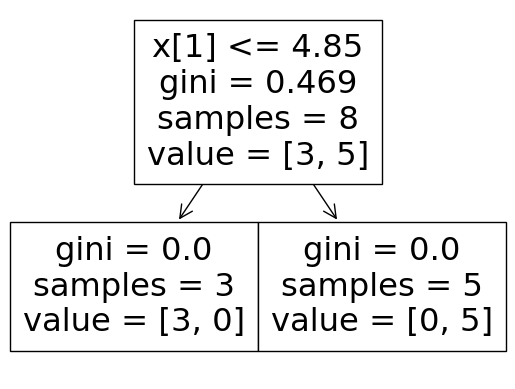

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


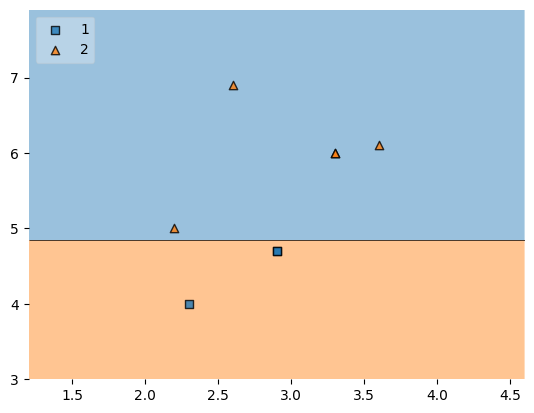

In [37]:
evaluate(dt_bag2, x, y)


In [38]:
# data for tree 
dt_bag3 = DecisionTreeClassifier()


df_bag3 = df_train.sample(8, replace=True)

x=df_bag3.iloc[:, 0:2]
y=df_bag3.iloc[:, -1]
df_bag3

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
63,2.9,4.7,1
109,3.6,6.1,2
53,2.3,4.0,1
63,2.9,4.7,1
66,3.0,4.5,1
109,3.6,6.1,2
66,3.0,4.5,1


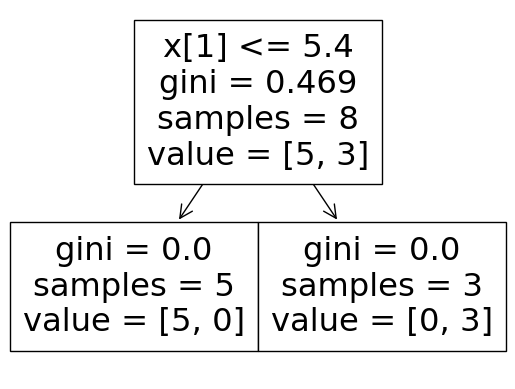

c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


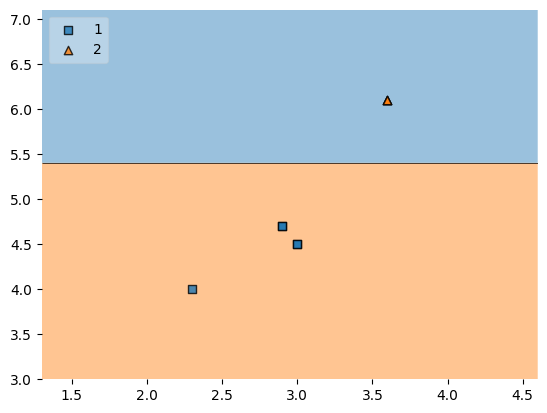

In [39]:
evaluate(dt_bag3, x, y)

## Predict



In [40]:
df_test

,SepalWidthCm,PetalLengthCm,Species
67,2.7,4.1,1
84,3.0,4.5,1
94,2.7,4.2,1
117,3.8,6.7,2
140,3.1,5.6,2


In [47]:
print( "Prediction 1", dt_bag1.predict(np.array([3.8,6.7]).reshape(1,2)))
print( "Prediction 2", dt_bag2.predict(np.array([3.8,6.7]).reshape(1,2)))
print( "Prediction 3", dt_bag3.predict(np.array([3.8,6.7]).reshape(1,2)))

Prediction 1 [2]
Prediction 2 [2]
Prediction 3 [2]


c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Pasting (Sample data will not repeat)

In [48]:
# ROw sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
118,2.6,6.9,2
115,3.2,5.3,2
119,2.2,5.0,2
100,3.3,6.0,2
136,3.4,5.6,2
66,3.0,4.5,1
53,2.3,4.0,1
72,2.5,4.9,1
109,3.6,6.1,2
63,2.9,4.7,1


In [49]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
63,2.9,4.7,1
72,2.5,4.9,1
100,3.3,6.0,2
118,2.6,6.9,2
109,3.6,6.1,2
115,3.2,5.3,2
66,3.0,4.5,1


### Random Subspaces (Column sampling is done in place of row sampling with/without replacement)

### Random patched (Both Row Sampling and Column sampling is done  with/without replacement)